In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
%config Completer.use_jedi = False

In [2]:
transactions = pd.read_excel("Transactions_dataset.xlsx", sheet_name=0)
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
demographic = pd.read_excel("Transactions_dataset.xlsx", sheet_name=2)
demographic.head()

C:\Users\martin\AppData\Local\Temp\ipykernel_15024\4103436347.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demographic = pd.read_excel("Transactions_dataset.xlsx", sheet_name=2)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
adresses = pd.read_excel("Transactions_dataset.xlsx", sheet_name=3)
adresses.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


# SQLite3 Connection

In [13]:
con = sqlite3.connect("marketing.db")
cursor = con.cursor()

In [ ]:
cursor.execute("DROP TABLE IF EXISTS Transactions;")
cursor.execute("DROP TABLE IF EXISTS Demographic;")
cursor.execute("DROP TABLE IF EXISTS Adresses;")

In [54]:
create_demographic = '''
    CREATE TABLE Demographic (
        customer_id INT PRIMARY KEY,
        first_name TEXT,
        last_name TEXT,
        gender TEXT,
        past_3_years_bike_related_purchases INT,
        DOB TIMESTAMP,
        job_title TEXT,
        job_industry_category TEXT,
        wealth_segment TEXT,
        deceased_indicator INT,
        owns_car INT,
        tenure INT
    );
'''

In [55]:
cursor.execute(create_demographic)

In [56]:
create_adresses = '''
        CREATE TABLE "Adresses" (
        "customer_id" INTEGER,
        "address" TEXT,
        "postcode" INTEGER,  "state" TEXT,
        "country" TEXT,
        "property_valuation" INTEGER,
        FOREIGN KEY (customer_id) REFERENCES Demographic(customer_id)
        )
'''

In [57]:
cursor.execute(create_adresses)

In [58]:
create_transactions = '''
    CREATE TABLE "Transactions" (
    "transaction_id" INTEGER,
    "product_id" INTEGER,
    "customer_id" INTEGER,
    "transaction_date" TIMESTAMP,
    "online_order" REAL,
    "order_status" TEXT,
    "brand" TEXT,
    "product_line" TEXT,
    "product_class" TEXT,
    "product_size" TEXT,
    "list_price" REAL,
    "standard_cost" REAL,
    "product_first_sold_date" REAL,
    PRIMARY KEY ("transaction_id"),
    FOREIGN KEY ("customer_id") REFERENCES Demographic(customer_id)
    )
'''

In [59]:
cursor.execute(create_transactions)

cursor.execute(create_demographic)
demographic.to_sql("Demographic", con, if_exists="replace")


In [60]:
transactions.to_sql("Transactions", con, if_exists="replace")

20000

In [61]:
demographic = demographic.drop(columns=["default"]) 
demographic.to_sql("Demographic", con, if_exists="replace")

4000

In [62]:
adresses.to_sql("Adresses", con, if_exists="replace")

3999

In [63]:
# SHOW TABLES
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    cursor.fetchall()

[('Transactions',), ('Demographic',), ('Adresses',)]

All tables are successfully inserted into sqlite3 database.

In [15]:
cursor.execute("SELECT * FROM Adresses LIMIT 5;")
cursor.fetchall()

[(0, 1, '060 Morning Avenue', 2016, 'New South Wales', 'Australia', 10),
 (1, 2, '6 Meadow Vale Court', 2153, 'New South Wales', 'Australia', 10),
 (2, 4, '0 Holy Cross Court', 4211, 'QLD', 'Australia', 9),
 (3, 5, '17979 Del Mar Point', 2448, 'New South Wales', 'Australia', 4),
 (4, 6, '9 Oakridge Court', 3216, 'VIC', 'Australia', 9)]

In [16]:
# We can use SQL queries and immediately output them into pandas dataframes for better viewing
cursor.execute("SELECT * FROM Demographic;")
cursor.fetchall()
selected_data = pd.read_sql("SELECT * FROM Demographic WHERE customer_id BETWEEN 100 AND 230",
                            con)
selected_data

,index,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,99,100,Tripp,Steed,Male,80,1968-05-11 00:00:00,General Manager,Financial Services,Mass Customer,N,Yes,4.0
1,100,101,Goran,Kwietek,Male,83,1975-12-29 00:00:00,Nurse Practicioner,Manufacturing,High Net Worth,N,No,11.0
2,101,102,Langsdon,Tranfield,Male,51,1956-11-27 00:00:00,Quality Control Specialist,Manufacturing,Affluent Customer,N,No,16.0
3,102,103,Ethyl,Runham,Female,49,1997-04-21 00:00:00,Product Engineer,Financial Services,Affluent Customer,N,Yes,4.0
4,103,104,Odille,Panketh,Female,40,1978-06-06 00:00:00,Automation Specialist II,Health,Mass Customer,N,Yes,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,225,226,Bondie,Letty,Male,96,1977-11-11 00:00:00,Database Administrator IV,Manufacturing,Mass Customer,N,No,20.0
127,226,227,Wendall,McKeand,Male,99,1973-08-14 00:00:00,Accountant I,Entertainment,Mass Customer,N,No,18.0
128,227,228,Lucia,Pickervance,Female,59,1986-05-25 00:00:00,Systems Administrator II,Manufacturing,High Net Worth,N,No,12.0
129,228,229,Vaughn,Lambis,Male,30,1966-03-06 00:00:00,None,Property,High Net Worth,N,No,19.0


# Data Cleaning in SQL

In [17]:
cursor.execute("PRAGMA table_info(Transactions);")
cursor.fetchall()

[(0, 'index', 'INTEGER', 0, None, 0),
 (1, 'transaction_id', 'INTEGER', 0, None, 0),
 (2, 'product_id', 'INTEGER', 0, None, 0),
 (3, 'customer_id', 'INTEGER', 0, None, 0),
 (4, 'transaction_date', 'TIMESTAMP', 0, None, 0),
 (5, 'online_order', 'REAL', 0, None, 0),
 (6, 'order_status', 'TEXT', 0, None, 0),
 (7, 'brand', 'TEXT', 0, None, 0),
 (8, 'product_line', 'TEXT', 0, None, 0),
 (9, 'product_class', 'TEXT', 0, None, 0),
 (10, 'product_size', 'TEXT', 0, None, 0),
 (11, 'list_price', 'REAL', 0, None, 0),
 (12, 'standard_cost', 'REAL', 0, None, 0),
 (13, 'product_first_sold_date', 'REAL', 0, None, 0)]

In [39]:
pd.read_sql("PRAGMA table_info(Transactions);", con)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,transaction_id,INTEGER,0,None,0
2,2,product_id,INTEGER,0,None,0
3,3,customer_id,INTEGER,0,None,0
4,4,transaction_date,TIMESTAMP,0,None,0
5,5,online_order,REAL,0,None,0
6,6,order_status,TEXT,0,None,0
7,7,brand,TEXT,0,None,0
8,8,product_line,TEXT,0,None,0
9,9,product_class,TEXT,0,None,0


In [40]:
pd.read_sql("PRAGMA table_info(Demographic);", con)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,customer_id,INTEGER,0,None,0
2,2,first_name,TEXT,0,None,0
3,3,last_name,TEXT,0,None,0
4,4,gender,TEXT,0,None,0
5,5,past_3_years_bike_related_purchases,INTEGER,0,None,0
6,6,DOB,TIMESTAMP,0,None,0
7,7,job_title,TEXT,0,None,0
8,8,job_industry_category,TEXT,0,None,0
9,9,wealth_segment,TEXT,0,None,0


In [41]:
pd.read_sql("PRAGMA table_info(Demographic);", con)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,customer_id,INTEGER,0,None,0
2,2,first_name,TEXT,0,None,0
3,3,last_name,TEXT,0,None,0
4,4,gender,TEXT,0,None,0
5,5,past_3_years_bike_related_purchases,INTEGER,0,None,0
6,6,DOB,TIMESTAMP,0,None,0
7,7,job_title,TEXT,0,None,0
8,8,job_industry_category,TEXT,0,None,0
9,9,wealth_segment,TEXT,0,None,0


In [18]:
sql_query = '''
    SELECT DISTINCT(gender) FROM Demographic;
'''
cursor.execute(sql_query)
cursor.fetchall()

[('F',), ('Male',), ('Female',), ('U',), ('Femal',), ('M',)]

In [19]:
# Update query
update_query = '''
    UPDATE Demographic
    SET gender = 'M'
    WHERE gender = 'Male'
'''
cursor.execute(update_query)
con.commit()

In [20]:
sql_query = '''
    SELECT DISTINCT(gender) FROM Demographic;
'''
cursor.execute(sql_query)
cursor.fetchall()

[('F',), ('M',), ('Female',), ('U',), ('Femal',)]

In [21]:
# Update query
update_query = '''
    UPDATE Demographic
    SET gender = 'F'
    WHERE gender IN ('Female', 'Femal')
'''
cursor.execute(update_query)
con.commit()

In [22]:
sql_query = '''
    SELECT DISTINCT(gender) FROM Demographic;
'''
cursor.execute(sql_query)
cursor.fetchall()

[('F',), ('M',), ('U',)]

In [24]:
cursor.execute('''
    SELECT DISTINCT(state) from Adresses;
''')
cursor.fetchall()

[('New South Wales',), ('QLD',), ('VIC',), ('NSW',), ('Victoria',)]

In [26]:
cursor.execute('''
    UPDATE Adresses
    SET state = 'New South Wales'
    WHERE state = 'NSW'
''')

cursor.execute('''
    UPDATE Adresses
    SET state = 'Victoria'
    WHERE state = 'VIC'
''')

cursor.execute('''
    UPDATE Adresses
    SET state = 'Queensland'
    WHERE state = "QLD"
''')

con.commit()

In [143]:
### Testing join
jointdata = pd.read_sql('''
    SELECT gender, job_industry_category, owns_car, brand, transaction_date FROM Transactions 
    LEFT JOIN Demographic ON
    Transactions.customer_id = Demographic.customer_id;''', con)
jointdata

,gender,job_industry_category,owns_car,brand,transaction_date
0,M,Financial Services,Yes,Solex,2017-02-25 00:00:00
1,F,Health,Yes,Trek Bicycles,2017-05-21 00:00:00
2,M,Retail,No,OHM Cycles,2017-10-16 00:00:00
3,M,Financial Services,No,Norco Bicycles,2017-08-31 00:00:00
4,F,Retail,Yes,Giant Bicycles,2017-10-01 00:00:00
...,...,...,...,...,...
19995,M,Manufacturing,Yes,OHM Cycles,2017-06-24 00:00:00
19996,F,Financial Services,No,Solex,2017-11-09 00:00:00
19997,F,Telecommunications,No,OHM Cycles,2017-04-14 00:00:00
19998,F,Financial Services,Yes,OHM Cycles,2017-07-03 00:00:00


# Profit by state

In [32]:
joindata = pd.read_sql('''
    SELECT state, SUM(list_price - standard_cost) AS profit
    FROM Transactions
    LEFT JOIN Adresses ON Transactions.customer_id = Adresses.customer_id
    GROUP BY state
''', con)

<AxesSubplot:xlabel='state', ylabel='profit'>

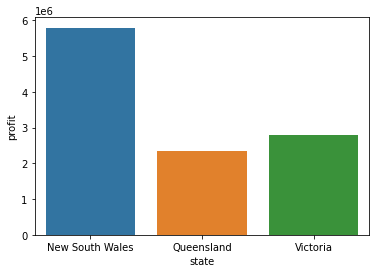

In [36]:
sns.barplot(x='state', y='profit', data=joindata)

# Profit by Gender

In [40]:
joindata = pd.read_sql('''
    SELECT gender, SUM(list_price - standard_cost) as profit
    FROM Transactions t
    LEFT JOIN Demographic d ON t.customer_id = d.customer_id
    GROUP BY gender
''', con)
joindata.head()

,gender,profit
0,None,2.694850e+02
1,F,5.433788e+06
2,M,5.225805e+06
3,U,2.704212e+05


<AxesSubplot:xlabel='gender', ylabel='profit'>

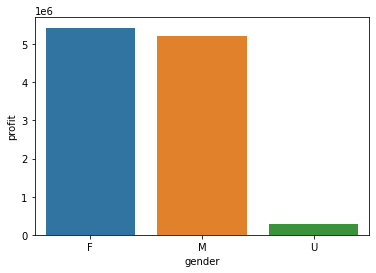

In [41]:
sns.barplot(x="gender", y="profit", data = joindata)

In [157]:
### Testing join
jointdata = pd.read_sql('''
    SELECT gender,COUNT(*) as 'count' FROM Transactions 
    LEFT JOIN Demographic ON
    Transactions.customer_id = Demographic.customer_id
    GROUP BY gender;''', con)
jointdata

,gender,count
0,None,3
1,F,10011
2,M,9531
3,U,455
